<a href="https://colab.research.google.com/github/mohib988/ml-project/blob/main/Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# jkljkaldjaklj

In [3]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import cufflinks as cf
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn import preprocessing
%matplotlib inline



<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
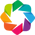

In [4]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.models import HoverTool
from IPython.display import HTML, display

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:

pathfile="/content/drive/MyDrive/AnomalyDetection.csv"
df=pd.read_csv(pathfile)

In [6]:
df.columns

Index(['Unnamed: 0', 'srb_invoice_id', 'pos_id', 'ntn', 'name', 'invoice_date',
       'invoice_no', 'rate_value', 'sales_value', 'sales_tax', 'consumer_name',
       'consumer_ntn', 'consumer_address', 'tariff_code', 'extra_info',
       'pos_user', 'pos_pass', 'is_active', 'created_date_time',
       'invoice_type', 'consider_for_Annex'],
      dtype='object')

In [7]:
#HIIIII

In [8]:

df=df.drop("Unnamed: 0",axis=1)

In [9]:

df['created_date_time']=pd.to_datetime(df['created_date_time'])
df['invoice_date']=pd.to_datetime(df['invoice_date'])


In [10]:
df["month"]=pd.DatetimeIndex(df['invoice_date']).month
df["weekday"]=pd.DatetimeIndex(df['invoice_date']).weekday


In [11]:
df[["pos_id","invoice_date","ntn","sales_value","invoice_date","is_active","consider_for_Annex","tariff_code"]]

pos_id        invoice_date  ntn  sales_value        invoice_date  \
0        387 2023-11-16 06:16:42   55     0.000000 2023-11-16 06:16:42   
1        452 2023-11-16 19:36:35  219    79.650000 2023-11-16 19:36:35   
2       1015 2023-11-18 02:12:24    3  2399.000000 2023-11-18 02:12:24   
3        286 2023-11-14 22:14:43  161  1150.439941 2023-11-14 22:14:43   
4        145 2023-08-05 20:34:58  161   331.859985 2023-08-05 20:34:58   
...      ...                 ...  ...          ...                 ...   
9995     643 2023-11-16 20:51:01   90  1221.000000 2023-11-16 20:51:01   
9996     690 2023-11-19 08:09:00   69   200.000000 2023-11-19 08:09:00   
9997     145 2023-11-16 16:02:58  161   177.000000 2023-11-16 16:02:58   
9998     845 2023-11-20 22:06:14  127   655.000000 2023-11-20 22:06:14   
9999     249 2023-11-16 11:02:29   85  1725.000000 2023-11-16 11:02:29   

      is_active  consider_for_Annex tariff_code  
0             1                   1         NaN  
1             1                   1         NaN  
2             1                   1         NaN  
3             1                   1         NaN  
4             1                   1         NaN  
...         ...                 ...         ...  
9995          1                   1         NaN  
9996          1                   1       N / A  
9997          1                   1         NaN  
9998          1                   1         NaN  
9999          1                   1         NaN  

[10000 rows x 8 columns]

In [12]:
def overview(df: pd.DataFrame, timestamp_col: str = None) -> None:
    print('Null Count:\n', df.isnull().sum(),'\n')
    print('Data Types:\n', df.dtypes)

    if timestamp_col is not None:
        print('\nDate Range:\n\nStart:\t',df[timestamp_col].min())
        print('End:\t',df[timestamp_col].max())
        print('Days:\t',(df[timestamp_col].max() - df[timestamp_col].min()))

#Initial Insight

In [ ]:
overview(df, timestamp_col='invoice_date')

Null Count:
 srb_invoice_id            0
pos_id                    0
ntn                       0
name                      0
invoice_date              0
invoice_no               12
rate_value                2
sales_value               0
sales_tax                 0
consumer_name          8416
consumer_ntn           8477
consumer_address       7895
tariff_code            9631
extra_info             9923
pos_user               6727
pos_pass              10000
is_active                 0
created_date_time         0
invoice_type             22
consider_for_Annex        0
month                     0
weekday                   0
dtype: int64 

Data Types:
 srb_invoice_id                object
pos_id                         int64
ntn                            int64
name                          object
invoice_date          datetime64[ns]
invoice_no                    object
rate_value                   float64
sales_value                  float64
sales_tax                    float64
consumer_n

In [ ]:
df

srb_invoice_id  pos_id  ntn               name  \
0     38720231116061635888     387   55           Rylee Yu   
1       453231116193635470     452  219       Hunter Ortiz   
2      1015231118021500582    1015    3       Luna Sanders   
3       284231114221443100     286  161         Hudson Liu   
4       144230805203458670     145  161         Hudson Liu   
...                    ...     ...  ...                ...   
9995     64320231116205101     643   90     Gabriel Brooks   
9996  69020231119080903840     690   69  Penelope Guerrero   
9997    144231116160258223     145  161         Hudson Liu   
9998    845231120220614308     845  127         Mila Leung   
9999     24920231116234820     249   85       Lincoln Hall   

            invoice_date            invoice_no  rate_value  sales_value  \
0    2023-11-16 06:16:42              39533554         0.0     0.000000   
1    2023-11-16 19:36:35       0039-701-254869        13.0    79.650000   
2    2023-11-18 02:12:24                 35628        13.0  2399.000000   
3    2023-11-14 22:14:43  23318127001218180072        13.0  1150.439941   
4    2023-08-05 20:34:58   2321712700280331809        13.0   331.859985   
...                  ...                   ...         ...          ...   
9995 2023-11-16 20:51:01                122082        13.0  1221.000000   
9996 2023-11-19 08:09:00                 74500        13.0   200.000000   
9997 2023-11-16 16:02:58   2332012700280330096        13.0   177.000000   
9998 2023-11-20 22:06:14      845-114-23-44693        13.0   655.000000   
9999 2023-11-16 11:02:29                 68942        13.0  1725.000000   

       sales_tax   consumer_name  ... tariff_code extra_info     pos_user  \
0       0.000000             NaN  ...         NaN        NaN  0819531_387   
1      10.350000             NaN  ...         NaN        NaN          NaN   
2     275.880000             NaN  ...         NaN        NaN          NaN   
3     149.559998             NaN  ...         NaN        NaN          NaN   
4      43.139999             NaN  ...         NaN        NaN          NaN   
...          ...             ...  ...         ...        ...          ...   
9995  158.600000  Mateo Williams  ...         NaN        NaN          NaN   
9996   26.000000           N / A  ...       N / A      N / A      2565752   
9997   23.010000             NaN  ...         NaN        NaN          NaN   
9998   85.000000  Mateo Williams  ...         NaN        NaN          NaN   
9999  224.000000             NaN  ...         NaN        NaN          NaN   

     pos_pass is_active   created_date_time  invoice_type consider_for_Annex  \
0         NaN         1 2023-11-16 06:16:36           1.0                  1   
1         NaN         1 2023-11-17 12:21:54           1.0                  1   
2         NaN         1 2023-11-18 02:24:16           1.0                  1   
3         NaN         1 2023-11-16 18:02:24           1.0                  1   
4         NaN         1 2023-11-17 04:01:03           1.0                  1   
...       ...       ...                 ...           ...                ...   
9995      NaN         1 2023-11-16 20:58:56           1.0                  1   
9996      NaN         1 2023-11-19 08:09:04           1.0                  1   
9997      NaN         1 2023-11-18 10:07:51           1.0                  1   
9998      NaN         1 2023-11-20 22:22:12           1.0                  1   
9999      NaN         1 2023-11-16 23:57:58           1.0                  1   

      month  weekday  
0        11        3  
1        11        3  
2        11        5  
3        11        1  
4         8        5  
...     ...      ...  
9995     11        3  
9996     11        6  
9997     11        3  
9998     11        0  
9999     11        3  

[10000 rows x 22 columns]

In [ ]:
df.describe()

pos_id           ntn   rate_value    sales_value     sales_tax  \
count  10000.00000  10000.000000  9998.000000   10000.000000  10000.000000   
mean     433.39160    127.037300    19.654067    1474.498852    191.225420   
std      279.93753     69.526544   208.021828    3500.942037    452.182708   
min        2.00000      1.000000     0.000000   -3008.850000   -391.150000   
25%      165.00000     55.000000    13.000000     318.580000     41.417500   
50%      395.00000    161.000000    13.000000     780.000000    102.389999   
75%      571.00000    182.000000    13.000000    1565.342500    205.922300   
max     1115.00000    249.000000  8110.000000  156000.000000  20280.000000   

       pos_pass  is_active  invoice_type  consider_for_Annex         month  \
count       0.0    10000.0   9978.000000        10000.000000  10000.000000   
mean        NaN        1.0      1.115354            0.956000     10.695400   
std         NaN        0.0      1.596837            0.205105      0.870457   
min         NaN        1.0      0.000000            0.000000      7.000000   
25%         NaN        1.0      1.000000            1.000000     11.000000   
50%         NaN        1.0      1.000000            1.000000     11.000000   
75%         NaN        1.0      1.000000            1.000000     11.000000   
max         NaN        1.0     49.000000            1.000000     12.000000   

            weekday  
count  10000.000000  
mean       3.065500  
std        2.021044  
min        0.000000  
25%        1.000000  
50%        3.000000  
75%        5.000000  
max        6.000000

In [ ]:
df.corr(method ='pearson')

pos_id       ntn  rate_value  sales_value  sales_tax  \
pos_id              1.000000 -0.022551    0.068188    -0.029820  -0.029863   
ntn                -0.022551  1.000000    0.065095    -0.057183  -0.052735   
rate_value          0.068188  0.065095    1.000000     0.053452   0.046189   
sales_value        -0.029820 -0.057183    0.053452     1.000000   0.992254   
sales_tax          -0.029863 -0.052735    0.046189     0.992254   1.000000   
pos_pass                 NaN       NaN         NaN          NaN        NaN   
is_active                NaN       NaN         NaN          NaN        NaN   
invoice_type        0.048246 -0.003586   -0.005819    -0.004707  -0.005494   
consider_for_Annex -0.081869  0.222013    0.018474     0.082280   0.082533   
month               0.355215 -0.169821    0.011196     0.061884   0.062196   
weekday            -0.028400  0.041320    0.019868     0.042427   0.042649   

                    pos_pass  is_active  invoice_type  consider_for_Annex  \
pos_id                   NaN        NaN      0.048246           -0.081869   
ntn                      NaN        NaN     -0.003586            0.222013   
rate_value               NaN        NaN     -0.005819            0.018474   
sales_value              NaN        NaN     -0.004707            0.082280   
sales_tax                NaN        NaN     -0.005494            0.082533   
pos_pass                 NaN        NaN           NaN                 NaN   
is_active                NaN        NaN           NaN                 NaN   
invoice_type             NaN        NaN      1.000000           -0.118995   
consider_for_Annex       NaN        NaN     -0.118995            1.000000   
month                    NaN        NaN      0.025312           -0.075076   
weekday                  NaN        NaN     -0.010124            0.038559   

                       month   weekday  
pos_id              0.355215 -0.028400  
ntn                -0.169821  0.041320  
rate_value          0.011196  0.019868  
sales_value         0.061884  0.042427  
sales_tax           0.062196  0.042649  
pos_pass                 NaN       NaN  
is_active                NaN       NaN  
invoice_type        0.025312 -0.010124  
consider_for_Annex -0.075076  0.038559  
month               1.000000 -0.043915  
weekday            -0.043915  1.000000

In [ ]:
# total null values for consumer
print(df.consumer_name.isna().sum())
print(df.consumer_ntn.isna().sum())
print(df.consumer_address.isna().sum())


In [ ]:
fig = go.Figure()
for ntn in df['ntn'].unique()[0:30]:
    df_ntn = df[df['ntn'] == ntn]
    daily_sales_ntn = df_ntn.groupby(df_ntn['invoice_date'].dt.date)['sales_value'].sum()
    fig.add_trace(go.Scatter(x=daily_sales_ntn.index, y=daily_sales_ntn.values, mode='lines+markers', name=f'NTN {ntn}'))

fig.update_layout(title='Daily Sales for NTN',
                  xaxis_title='Date',
                  yaxis_title='Sales Value')

fig.show()

In [ ]:
+


# Convert 'invoice_date' column to datetime format
# Set 'invoice_date' as the DataFrame index
# df.set_index('invoice_date', inplace=True)

# Perform seasonal decomposition for sales_value
decomposition = seasonal_decompose(df['sales_value'], model='additive', period=1)

# Get the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Calculate anomalies based on residuals (using a threshold of 500 for example)
anomaly_threshold =110
anomalies = (residual > anomaly_threshold) | (residual < -anomaly_threshold)

# Visualize the decomposition and anomalies
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df['sales_value'], label='Original Sales Data')
plt.legend()

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.plot(residual[anomalies], 'ro', label='Anomalies')
plt.legend()

plt.tight_layout()
plt.show()

# Print or visualize anomalies
anomaly_dates = df.index[anomalies]
print("Anomalies:")
print(anomaly_dates)


In [ ]:
anomaly_dates

DatetimeIndex([], dtype='datetime64[ns]', name='invoice_date', freq=None)

In [ ]:
a=df.groupby(["month","ntn"]).sales_value.count().reset_index(name="sales")
a

month  ntn  sales
0        7  161    186
1        8  161    427
2        9   61      3
3        9  161    324
4       10   61      7
..     ...  ...    ...
219     11  245     29
220     11  246     17
221     11  248     39
222     11  249      8
223     12  225      5

[224 rows x 3 columns]

from matplotlib import pyplot as plt
a['month'].plot(kind='hist', bins=20, title='month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
a['ntn'].plot(kind='hist', bins=20, title='ntn')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
a['sales'].plot(kind='hist', bins=20, title='sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
a.plot(kind='scatter', x='month', y='ntn', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
a.plot(kind='scatter', x='ntn', y='sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['ntn']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = a.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('ntn')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = a.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['month']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'month'}, axis=1)
              .sort_values('month', ascending=True))
  xs = counted['month']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = a.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
a['month'].plot(kind='line', figsize=(8, 4), title='month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
a['ntn'].plot(kind='line', figsize=(8, 4), title='ntn')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
a['sales'].plot(kind='line', figsize=(8, 4), title='sales')
plt.gca().spines[['top', 'right']].set_visible(False)

#Sales `Averga` and Sales `Sum` Per Weeks

In [ ]:
a=df.groupby("weekday").sales_value.sum().reset_index(name="total_sales_per_week")
a.sort_values(by="total_sales_per_week",ascending=False)

weekday  total_sales_per_week
6        6          2.774255e+06
1        1          2.507581e+06
5        5          2.385937e+06
4        4          2.048875e+06
3        3          1.791916e+06
2        2          1.774179e+06
0        0          1.462246e+06

In [ ]:
a=df.groupby("weekday").sales_value.mean().reset_index(name="average_sales_per_week")
a.sort_values(by="average_sales_per_week",ascending=False)

weekday  average_sales_per_week
6        6             1794.472523
3        3             1512.165338
5        5             1502.479195
4        4             1499.908257
2        2             1409.196821
1        1             1318.391932
0        0             1267.111074

In [ ]:
grouped_data = df.groupby('weekday')['sales_value'].sum().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(grouped_data, x='weekday', y='sales_value', labels={'sales_value': 'Sum of Sales Value', 'weekday': 'Weekday'})
fig.update_layout(title='Sum of Sales Value by Weekday')
fig.show()

In [ ]:
filtered_df = df[(df["consumer_name"]==0) & (df["consumer_address"]==0)]

# Create a line plot with weeks and sales for non-null consumer addresses using Plotly Express
# sns.barplot(filtered_df, x='weekday', y='sales_value' )


In [ ]:
df

srb_invoice_id  pos_id  ntn               name  \
0     38720231116061635888     387   55           Rylee Yu   
1       453231116193635470     452  219       Hunter Ortiz   
2      1015231118021500582    1015    3       Luna Sanders   
3       284231114221443100     286  161         Hudson Liu   
4       144230805203458670     145  161         Hudson Liu   
...                    ...     ...  ...                ...   
9995     64320231116205101     643   90     Gabriel Brooks   
9996  69020231119080903840     690   69  Penelope Guerrero   
9997    144231116160258223     145  161         Hudson Liu   
9998    845231120220614308     845  127         Mila Leung   
9999     24920231116234820     249   85       Lincoln Hall   

            invoice_date            invoice_no  rate_value  sales_value  \
0    2023-11-16 06:16:42              39533554         0.0     0.000000   
1    2023-11-16 19:36:35       0039-701-254869        13.0    79.650000   
2    2023-11-18 02:12:24                 35628        13.0  2399.000000   
3    2023-11-14 22:14:43  23318127001218180072        13.0  1150.439941   
4    2023-08-05 20:34:58   2321712700280331809        13.0   331.859985   
...                  ...                   ...         ...          ...   
9995 2023-11-16 20:51:01                122082        13.0  1221.000000   
9996 2023-11-19 08:09:00                 74500        13.0   200.000000   
9997 2023-11-16 16:02:58   2332012700280330096        13.0   177.000000   
9998 2023-11-20 22:06:14      845-114-23-44693        13.0   655.000000   
9999 2023-11-16 11:02:29                 68942        13.0  1725.000000   

       sales_tax   consumer_name  ... tariff_code extra_info     pos_user  \
0       0.000000             NaN  ...         NaN        NaN  0819531_387   
1      10.350000             NaN  ...         NaN        NaN          NaN   
2     275.880000             NaN  ...         NaN        NaN          NaN   
3     149.559998             NaN  ...         NaN        NaN          NaN   
4      43.139999             NaN  ...         NaN        NaN          NaN   
...          ...             ...  ...         ...        ...          ...   
9995  158.600000  Mateo Williams  ...         NaN        NaN          NaN   
9996   26.000000           N / A  ...       N / A      N / A      2565752   
9997   23.010000             NaN  ...         NaN        NaN          NaN   
9998   85.000000  Mateo Williams  ...         NaN        NaN          NaN   
9999  224.000000             NaN  ...         NaN        NaN          NaN   

     pos_pass is_active   created_date_time  invoice_type consider_for_Annex  \
0         NaN         1 2023-11-16 06:16:36           1.0                  1   
1         NaN         1 2023-11-17 12:21:54           1.0                  1   
2         NaN         1 2023-11-18 02:24:16           1.0                  1   
3         NaN         1 2023-11-16 18:02:24           1.0                  1   
4         NaN         1 2023-11-17 04:01:03           1.0                  1   
...       ...       ...                 ...           ...                ...   
9995      NaN         1 2023-11-16 20:58:56           1.0                  1   
9996      NaN         1 2023-11-19 08:09:04           1.0                  1   
9997      NaN         1 2023-11-18 10:07:51           1.0                  1   
9998      NaN         1 2023-11-20 22:22:12           1.0                  1   
9999      NaN         1 2023-11-16 23:57:58           1.0                  1   

      month  weekday  
0        11        3  
1        11        3  
2        11        5  
3        11        1  
4         8        5  
...     ...      ...  
9995     11        3  
9996     11        6  
9997     11        3  
9998     11        0  
9999     11        3  

[10000 rows x 22 columns]

#`Averge Sales` sorted for *resturants*

In [ ]:
a=df.groupby("ntn").sales_value.mean().reset_index(name="average_sales_per_rest")
a.sort_values(by="average_sales_per_rest",ascending=False)

ntn  average_sales_per_rest
108  122            31143.000000
127  144            21640.000000
159  179            19957.500000
177  201            19047.615000
26    30            17598.000000
..   ...                     ...
109  123              371.038462
163  184              366.548600
14    16              350.000000
148  167              240.800000
191  216               86.935294

[218 rows x 2 columns]

In [ ]:
# Total Registerd Restaurants
df.ntn.nunique()

218

In [ ]:
# total pos systems
df['pos_id'].nunique()


596

###Total **Pos** for each Restaurant

In [ ]:
ntn_pos_count = df.groupby('ntn')['pos_id'].nunique().reset_index(name='total_pos')

# Finding the NTN with the most unique POS occurrences
# ntn_with_most_pos = ntn_pos_count.loc[ntn_pos_count['total_unique_pos_count'].idxmax()]

# print("NTN with the most unique POS occurrences:")
print(ntn_pos_count.sort_values(by="total_pos",ascending=False))

     ntn  total_pos
194  219         76
142  161         67
48    55         27
68    75         23
195  220         16
..   ...        ...
88    98          1
90   101          1
91   103          1
92   104          1
217  249          1

[218 rows x 2 columns]


In [ ]:
total_value=ntn_pos_count['total_pos'].count()

In [ ]:
fig = px.pie(values=ntn_pos_count['total_pos'], names=ntn_pos_count['ntn'])
total_value=ntn_pos_count['total_pos'].sum()
fig.update_layout(
    autosize=False,
    margin=dict(l=20, r=20, t=20, b=20),
    width=600,  # Adjust the width as needed
    height=600  # Adjust the height as needed
)

# Update hover information (customizing what appears on hover)
fig.update_traces(
  hovertemplate='<b>ntn=%{label}</b><br>no. of pos=%{value}',
    textinfo='value',
    textfont_size=1
)
fig.update_layout(annotations=[dict(text=f'Total: {total_value}', showarrow=False,font_size=14)])
fig.show()

##Restuarnt wtih less tax then `12%` percente

In [ ]:
df[['name',"rate_value"]][df["rate_value"]<12][df["name"]=="Anthony Rogers"].count()

<ipython-input-23-960aa3f39679>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



name          36
rate_value    36
dtype: int64

In [ ]:
filtered_data=df[['name',"rate_value","ntn","pos_id"]][df["rate_value"]<12]
fig = px.bar(filtered_data,x="name", y=filtered_data["rate_value"]+1,color="pos_id")

# Customizing colors to darker shades
fi    g.update_traces(marker_color='lightblue', marker_line_color='blue', marker_line_width=1)

# Adjusting the y-axis range to ensure all bars are visible
# fig.update_yaxes(range=[0, filtered_data["rate_value"].max() + 2])  # Adjust range as needed
fig.update_traces(hovertemplate='Value: %{y}')
fig.update_layout(xaxis_title='Owner Name', yaxis_title='each tax Count')
fig.show()


In [ ]:
fig = px.histogram(filtered_data,x="name", nbins=12, labels={'value':'Restaurant Owner Name',},
             title='Restaurant with low tax', marginal='violin',
                   color='ntn',
            color_discrete_sequence=['green'],
                    hover_data={'ntn': True})

fig.update_layout(legend=dict(title='Owner'))
fig.update_layout(xaxis_title='Owner Name', yaxis_title='Anomaly Count')
fig.show()

#**Most Buying Range**

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame

# plt.figure(figsize=(10, 6))
# sns.set(style="whitegrid", rc={"axes.facecolor": "##FF914D"})  # Set background color

# sns.histplot(df["sales_value"], bins=400, color="#FFA500")  # Adjust the main histogram color
# plt.title('Sales Value',fontsize=20)
# plt.xlabel('Sales',fontsize=16)
# plt.ylabel('Sales Count',fontsize=16)
# plt.gcf().set_facecolor('#F6F6E9')
# plt.gca().set_facecolor('#F6F6E9')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.xlim(1, 6000)
# plt.show()
fig = px.histogram(df["sales_value"], nbins=500, labels={'value':'Restaurant Sales',},
             title='Sales Value', marginal='violin',
            color_discrete_sequence=['orange'])
fig.update_layout(legend=dict(title='sales'))
fig.update_layout(xaxis_title='Sales', yaxis_title='sales Count')
fig.show()


#**Unmatch total tax per sale**

In [ ]:
upper_bound=df['sales_value'] * (df['rate_value'] / 100 + 0.1)
lower_bound=df['sales_value'] * (df['rate_value'] / 100 - 0.1)
new1=(df["sales_tax"]>lower_bound) & (df["sales_tax"]<upper_bound)
new2=(df["sales_tax"]<lower_bound) | (df["sales_tax"]>upper_bound)
df.loc[new2, ["sales_tax", "sales_value", "rate_value"]]


sales_tax  sales_value  rate_value
12        65.57       524.43         0.0
27       509.60      4431.00      3920.0
84       253.67      2205.00         0.0
99        51.19       445.00         0.0
113      281.86         0.00        13.0
...         ...          ...         ...
9706     220.31      1915.00         0.0
9761     281.86         0.00        13.0
9924      63.27       586.73         0.0
9951     116.19      1010.00         0.0
9955      32.21       247.79         0.0

[197 rows x 3 columns]

In [ ]:
# Creating a scatter plot
fig = px.scatter(df, x='sales_tax', y='sales_value', color='ntn',
                 labels={'sales_value': 'Sales Value', 'sales_tax': 'Sales Tax', 'ntn': 'NTN','rate_value': 'Rate Value'},
                 title='Sales Value vs. Sales Tax by NTN',
                 hover_data={'ntn': True, 'sales_value': True, 'sales_tax': True,'rate_value':True,},
                 color_discrete_sequence=["BLUE"]
                 )

fig.update_layout(
    xaxis=dict(title='Sales Value'),
    yaxis=dict(title='Sales Tax'),
    legend=dict(title='NTN', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))

In [ ]:
df.ntn.nunique()

218

In [ ]:
a=(((df['created_date_time'] - df['invoice_date']))).dt.total_seconds().reset_index(name="time").sort_values(by="time")
a.loc[a["time"]>=0]
# a[a['index']==4410]

index        time
4110   4110         0.0
9972   9972         0.0
3691   3691         0.0
4146   4146         0.0
6064   6064         0.0
...     ...         ...
2541   2541  28992084.0
821     821  28994518.0
776     776  29000919.0
8187   8187  29009722.0
1589   1589  29021767.0

[7794 rows x 2 columns]

In [ ]:
(df['created_date_time'][4410] - df['invoice_date'][4410])

Timedelta('0 days 00:11:25')

In [ ]:
df.loc[df.index==4110,["invoice_date","created_date_time"]]

invoice_date   created_date_time
4110 2023-11-18 02:57:01 2023-11-18 02:57:01

##1. min max scaler for each column formula is `( x − x m i n ) / ( x m a x − x m i n )`
##2. Sklearn library processing could be used



In [ ]:
df.columns

Index(['srb_invoice_id', 'pos_id', 'ntn', 'name', 'invoice_date', 'invoice_no',
       'rate_value', 'sales_value', 'sales_tax', 'consumer_name',
       'consumer_ntn', 'consumer_address', 'tariff_code', 'extra_info',
       'pos_user', 'pos_pass', 'is_active', 'created_date_time',
       'invoice_type', 'consider_for_Annex', 'month', 'weekday'],
      dtype='object')

In [ ]:
# df.rate_value=df.rate_value.fillna(0)
df.sales_value.isna().sum()
# df["sales_value"]
# Grouping by 'ntn' and counting the occurrences of 'sales_value'
ntn_counts = df.groupby("ntn")['sales_value'].count()

# Getting the 'ntn' values where the count is less than 5
ntn_to_remove = ntn_counts[ntn_counts < 5].index.tolist()

# Filtering the DataFrame to exclude the 'ntn' with counts less than 5
df = df[~df['ntn'].isin(ntn_to_remove)]

# df.sales_value=df.sales_value.fillna(0)
# df.rate_value=df.rate_value.fillna(0)

0

#Data processing

#### Droping all adjusting null values

In [96]:
print(df.consumer_name.isna().sum())
print(df.consumer_ntn.isna().sum())
print(df.rate_value.isna())
print(df.tariff_code.isna().sum())

0
7739
0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: rate_value, Length: 9026, dtype: bool
8717


In [97]:
# df.columns

df.extra_info= df.extra_info.replace(['N / A',"0","0.0"], 0)
df.consumer_name= df.consumer_name.replace(['N / A',"0","0.0"], 0)
df.extra_info= df.extra_info.replace(['test'], 1)
df.extra_info=df.extra_info.fillna(0)
df.rate_value=df.rate_value.fillna(0)
df.consumer_address=df.consumer_address.fillna(0)
df.consumer_address=df.consumer_address.fillna(0)
df.consumer_address=df.consumer_address.replace(['N / A',"0","0.0"], 0)
# df.loc[df.consumer_name!=0,"consumer_name"]=1
df.consumer_name=df.consumer_name.fillna(0)





In [98]:
# just taking unique dates
df = df.drop_duplicates(subset='invoice_date')


In [99]:
# df["sales_value"]
# Grouping by 'ntn' and counting the occurrences of 'sales_value'
ntn_counts = df.groupby("ntn")['sales_value'].count()

# Getting the 'ntn' values where the count is less than 5
ntn_to_remove = ntn_counts[ntn_counts < 5].index.tolist()

# Filtering the DataFrame to exclude the 'ntn' with counts less than 5
df = df[~df['ntn'].isin(ntn_to_remove)]


In [100]:
# making every consumer_name=1
df.loc[(df.consumer_name!="N / A") & (df.consumer_name!=0) & (df.consumer_name!=""),"consumer_name"]=1
df.loc[(df.consumer_address!="N / A") & (df.consumer_address!=0) & (df.consumer_address!=""),"consumer_address"]=1

In [101]:
drop_cols=["name","consumer_ntn","pos_pass","pos_user","tariff_code","srb_invoice_id","invoice_no","created_date_time","rate_value","sales_tax"]
df2=df.drop(drop_cols,axis=1).copy()

In [102]:
df2

pos_id  ntn        invoice_date  sales_value  consumer_name  \
0        387   55 2023-11-16 06:16:42     0.000000              0   
1        452  219 2023-11-16 19:36:35    79.650000              0   
2       1015    3 2023-11-18 02:12:24  2399.000000              0   
3        286  161 2023-11-14 22:14:43  1150.439941              0   
4        145  161 2023-08-05 20:34:58   331.859985              0   
...      ...  ...                 ...          ...            ...   
9995     643   90 2023-11-16 20:51:01  1221.000000              1   
9996     690   69 2023-11-19 08:09:00   200.000000              0   
9997     145  161 2023-11-16 16:02:58   177.000000              0   
9998     845  127 2023-11-20 22:06:14   655.000000              1   
9999     249   85 2023-11-16 11:02:29  1725.000000              0   

      consumer_address  extra_info  is_active  invoice_type  \
0                    0         0.0          1           1.0   
1                    0         0.0          1           1.0   
2                    0         0.0          1           1.0   
3                    1         0.0          1           1.0   
4                    1         0.0          1           1.0   
...                ...         ...        ...           ...   
9995                 0         0.0          1           1.0   
9996                 0         0.0          1           1.0   
9997                 1         0.0          1           1.0   
9998                 0         0.0          1           1.0   
9999                 0         0.0          1           1.0   

      consider_for_Annex  month  weekday  scaled_sales_value  scaled_ntn  \
0                      1     11        3           -0.625018   -0.713043   
1                      1     11        3           -0.558838    0.713043   
2                      1     11        5            1.368252   -1.165217   
3                      1     11        1            0.330855    0.208696   
4                      1      8        5           -0.349283    0.208696   
...                  ...    ...      ...                 ...         ...   
9995                   1     11        3            0.389481   -0.408696   
9996                   1     11        6           -0.458843   -0.591304   
9997                   1     11        3           -0.477953    0.208696   
9998                   1     11        0           -0.080794   -0.086957   
9999                   1     11        3            0.808242   -0.452174   

      scaled_pos_id  
0         -0.002632  
1          0.168421  
2          1.650000  
3         -0.268421  
4         -0.639474  
...             ...  
9995       0.671053  
9996       0.794737  
9997      -0.639474  
9998       1.202632  
9999      -0.365789  

[9026 rows x 15 columns]

##_Reduced_ Columns now are

In [103]:
df2.columns

Index(['pos_id', 'ntn', 'invoice_date', 'sales_value', 'consumer_name',
       'consumer_address', 'extra_info', 'is_active', 'invoice_type',
       'consider_for_Annex', 'month', 'weekday', 'scaled_sales_value',
       'scaled_ntn', 'scaled_pos_id'],
      dtype='object')

##Hot Encoding

In [104]:

weekday_dummies = pd.get_dummies(df2['weekday'], prefix='weekday')
month_dummies = pd.get_dummies(df2['month'], prefix='month')
# Concatenate the dummy variables with the original dataset
df2 = pd.concat([df2, weekday_dummies], axis=1)

# Drop the original 'weekday' column if needed
df2.drop('weekday', axis=1, inplace=True)  # Drop the original column
df2.drop('month', axis=1, inplace=True)  # Drop the original column

# Display the updated dataset


#Isolation Forest

In [105]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

df3 = df2.select_dtypes(include=['float64', 'int64']).copy()  # Selecting only numeric columns

# Handling missing values (filling with mean for example)
df3.fillna(df3.mean(), inplace=True)

# Normalize the data if needed (using StandardScaler)
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df3)

# Applying Isolation Forest
isolation_forest = IsolationForest(contamination=0.05)
isolation_forest.fit(df_normalized)

# Predict outliers/anomalies
outliers = isolation_forest.predict(df_normalized)


In [106]:
# Add outlier predictions to the original DataFrame
df3['outlier'] = outliers

# Display rows identified as outliers
detected_outliers = df3[df3['outlier'] == -1]  # Outliers are labeled as 1



In [107]:
df3

pos_id  ntn  sales_value  consumer_name  consumer_address  extra_info  \
0        387   55     0.000000              0                 0         0.0   
1        452  219    79.650000              0                 0         0.0   
2       1015    3  2399.000000              0                 0         0.0   
3        286  161  1150.439941              0                 1         0.0   
4        145  161   331.859985              0                 1         0.0   
...      ...  ...          ...            ...               ...         ...   
9995     643   90  1221.000000              1                 0         0.0   
9996     690   69   200.000000              0                 0         0.0   
9997     145  161   177.000000              0                 1         0.0   
9998     845  127   655.000000              1                 0         0.0   
9999     249   85  1725.000000              0                 0         0.0   

      is_active  invoice_type  consider_for_Annex  scaled_sales_value  \
0             1           1.0                   1           -0.625018   
1             1           1.0                   1           -0.558838   
2             1           1.0                   1            1.368252   
3             1           1.0                   1            0.330855   
4             1           1.0                   1           -0.349283   
...         ...           ...                 ...                 ...   
9995          1           1.0                   1            0.389481   
9996          1           1.0                   1           -0.458843   
9997          1           1.0                   1           -0.477953   
9998          1           1.0                   1           -0.080794   
9999          1           1.0                   1            0.808242   

      scaled_ntn  scaled_pos_id  outlier  
0      -0.713043      -0.002632        1  
1       0.713043       0.168421        1  
2      -1.165217       1.650000        1  
3       0.208696      -0.268421        1  
4       0.208696      -0.639474        1  
...          ...            ...      ...  
9995   -0.408696       0.671053        1  
9996   -0.591304       0.794737        1  
9997    0.208696      -0.639474        1  
9998   -0.086957       1.202632        1  
9999   -0.452174      -0.365789        1  

[9026 rows x 13 columns]

In [108]:
df3["anomaly"]=df3["outlier"]-1

In [109]:
df2["anomaly"]=df3["anomaly"]


In [110]:
df2.loc[df2.anomaly==-2,"anomaly"]=1

In [111]:
df2.anomaly.sum()

314

#With Time





In [112]:
df3=df2.copy()

In [113]:
df_hourly = df3.set_index('invoice_date').resample('H').mean().reset_index()
df_daily = df3.set_index('invoice_date').resample('D').mean().reset_index()
df_weekly = df3.set_index('invoice_date').resample('W').mean().reset_index()
for DataFrame in [df_hourly, df_daily]:
    DataFrame['Weekday'] = (pd.Categorical(DataFrame['invoice_date'].dt.strftime('%A'),
                                           categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
                           )
    DataFrame['Hour'] = DataFrame['invoice_date'].dt.hour
    DataFrame['Day'] = DataFrame['invoice_date'].dt.weekday
    DataFrame['Month'] = DataFrame['invoice_date'].dt.month
    DataFrame['Year'] = DataFrame['invoice_date'].dt.year
    DataFrame['Month_day'] = DataFrame['invoice_date'].dt.day
    DataFrame['Lag'] = DataFrame['sales_value'].shift(1)
    DataFrame['Rolling_Mean'] = DataFrame['sales_value'].rolling(7, min_periods=1).mean()
    DataFrame = DataFrame.dropna()

df_hourly = (df_hourly
             .join(df_hourly.groupby(['Hour','Weekday'])['sales_value'].mean(),
                   on = ['Hour', 'Weekday'], rsuffix='_Average')
            )

df_daily = (df_daily
            .join(df_daily.groupby(['Hour','Weekday'])['sales_value'].mean(),
                  on = ['Hour', 'Weekday'], rsuffix='_Average')
           )
df_hourly=df_hourly.dropna(subset=['sales_value', 'Hour', 'Day', 'Month_day', 'Month','Rolling_Mean','Lag', 'invoice_date'])


# Daily
df_daily_model_data = df_daily[['sales_value', 'Hour', 'Day',  'Month','Month_day','Rolling_Mean']].dropna()
# Hourly
model_data = df_hourly.set_index('invoice_date').dropna()
model_data=model_data.drop(columns=["Weekday","weekday_0","weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6","anomaly"],axis=1)
model_data

pos_id         ntn  sales_value  consumer_name  \
invoice_date                                                          
2023-07-16 20:00:00  144.75  161.000000   522.127495            0.0   
2023-07-16 21:00:00  143.00  161.000000   336.299988            0.0   
2023-07-16 22:00:00  144.50  161.000000   977.880035            0.0   
2023-07-16 23:00:00  144.00  161.000000   212.389999            0.0   
2023-07-17 13:00:00  143.50  161.000000   646.019989            0.0   
...                     ...         ...          ...            ...   
2023-11-22 06:00:00  500.80   57.800000    40.000000            0.0   
2023-11-22 07:00:00  547.60   85.100000   481.215000            0.0   
2023-11-22 08:00:00  264.00  108.727273   497.386363            0.0   
2023-11-22 09:00:00  602.00   55.000000     0.000000            0.0   
2023-11-22 10:00:00  349.80  101.000000  1690.748000            0.4   

                     consumer_address  extra_info  is_active  invoice_type  \
invoice_date                                                                 
2023-07-16 20:00:00          1.000000         0.0        1.0      1.000000   
2023-07-16 21:00:00          1.000000         0.0        1.0      1.000000   
2023-07-16 22:00:00          1.000000         0.0        1.0      1.000000   
2023-07-16 23:00:00          1.000000         0.0        1.0      1.000000   
2023-07-17 13:00:00          1.000000         0.0        1.0      1.000000   
...                               ...         ...        ...           ...   
2023-11-22 06:00:00          0.000000         0.0        1.0      1.200000   
2023-11-22 07:00:00          0.000000         0.0        1.0      1.200000   
2023-11-22 08:00:00          0.090909         0.0        1.0      1.181818   
2023-11-22 09:00:00          0.000000         0.0        1.0      1.000000   
2023-11-22 10:00:00          0.000000         0.0        1.0      1.000000   

                     consider_for_Annex  scaled_sales_value  scaled_ntn  \
invoice_date                                                              
2023-07-16 20:00:00            1.000000           -0.191195    0.208696   
2023-07-16 21:00:00            1.000000           -0.345594    0.208696   
2023-07-16 22:00:00            1.000000            0.187479    0.208696   
2023-07-16 23:00:00            1.000000           -0.448548    0.208696   
2023-07-17 13:00:00            1.000000           -0.088256    0.208696   
...                                 ...                 ...         ...   
2023-11-22 06:00:00            0.800000           -0.591783   -0.688696   
2023-11-22 07:00:00            0.800000           -0.225188   -0.451304   
2023-11-22 08:00:00            0.818182           -0.211752   -0.245850   
2023-11-22 09:00:00            1.000000           -0.625018   -0.713043   
2023-11-22 10:00:00            1.000000            0.779783   -0.313043   

                     scaled_pos_id  Hour  Day  Month  Year  Month_day  \
invoice_date                                                            
2023-07-16 20:00:00      -0.640132    20    6      7  2023         16   
2023-07-16 21:00:00      -0.644737    21    6      7  2023         16   
2023-07-16 22:00:00      -0.640789    22    6      7  2023         16   
2023-07-16 23:00:00      -0.642105    23    6      7  2023         16   
2023-07-17 13:00:00      -0.643421    13    0      7  2023         17   
...                            ...   ...  ...    ...   ...        ...   
2023-11-22 06:00:00       0.296842     6    2     11  2023         22   
2023-11-22 07:00:00       0.420000     7    2     11  2023         22   
2023-11-22 08:00:00      -0.326316     8    2     11  2023         22   
2023-11-22 09:00:00       0.563158     9    2     11  2023         22   
2023-11-22 10:00:00      -0.100526    10    2     11  2023         22   

                            Lag  Rolling_Mean  sales_value_Average  
invoice_date                                                        
2023-07-16 20:00:0

In [114]:
from sklearn.ensemble import IsolationForest
import pandas as pd

def run_isolation_forest(model_data: pd.DataFrame, contamination=0.05, n_estimators=200, max_samples=0.7) -> pd.DataFrame:
    IF = IsolationForest(random_state=0,
                         contamination=contamination,
                         n_estimators=n_estimators,
                         max_samples=max_samples
                         )

    IF.fit(model_data)

    outlier_prediction = IF.predict(model_data)

    model_data['anomaly1'] = (outlier_prediction == -1).astype(int)  # Assign 1 for outliers, 0 for inliers
    model_data['anomaly1'] = model_data['anomaly1'].fillna(0)  # Replace NaN with 0 for anomaly column

    return model_data


In [115]:
model_data= run_isolation_forest(model_data)

In [116]:
model_data.anomaly1.sum()

40

In [117]:
# Reset the index to convert 'invoice_date' from index to a column
model_data.reset_index(inplace=True)

# Merge 'anomaly' column from 'model_data' to 'df2' based on 'invoice_date' column
df3_with_anomaly = pd.merge(df3, model_data[['invoice_date', 'anomaly1']], on='invoice_date', how='left')
df3_with_anomaly.anomaly1.fillna(0)
# Replace NaN values in the 'anomaly' column with zeros
df3_with_anomaly

pos_id  ntn        invoice_date  sales_value  consumer_name  \
0        387   55 2023-11-16 06:16:42     0.000000              0   
1        452  219 2023-11-16 19:36:35    79.650000              0   
2       1015    3 2023-11-18 02:12:24  2399.000000              0   
3        286  161 2023-11-14 22:14:43  1150.439941              0   
4        145  161 2023-08-05 20:34:58   331.859985              0   
...      ...  ...                 ...          ...            ...   
9021     643   90 2023-11-16 20:51:01  1221.000000              1   
9022     690   69 2023-11-19 08:09:00   200.000000              0   
9023     145  161 2023-11-16 16:02:58   177.000000              0   
9024     845  127 2023-11-20 22:06:14   655.000000              1   
9025     249   85 2023-11-16 11:02:29  1725.000000              0   

      consumer_address  extra_info  is_active  invoice_type  \
0                    0         0.0          1           1.0   
1                    0         0.0          1           1.0   
2                    0         0.0          1           1.0   
3                    1         0.0          1           1.0   
4                    1         0.0          1           1.0   
...                ...         ...        ...           ...   
9021                 0         0.0          1           1.0   
9022                 0         0.0          1           1.0   
9023                 1         0.0          1           1.0   
9024                 0         0.0          1           1.0   
9025                 0         0.0          1           1.0   

      consider_for_Annex  ...  scaled_pos_id  weekday_0  weekday_1  weekday_2  \
0                      1  ...      -0.002632          0          0          0   
1                      1  ...       0.168421          0          0          0   
2                      1  ...       1.650000          0          0          0   
3                      1  ...      -0.268421          0          1          0   
4                      1  ...      -0.639474          0          0          0   
...                  ...  ...            ...        ...        ...        ...   
9021                   1  ...       0.671053          0          0          0   
9022                   1  ...       0.794737          0          0          0   
9023                   1  ...      -0.639474          0          0          0   
9024                   1  ...       1.202632          1          0          0   
9025                   1  ...      -0.365789          0          0          0   

      weekday_3  weekday_4  weekday_5  weekday_6  anomaly  anomaly1  
0             1          0          0          0        0       NaN  
1             1          0          0          0        0       NaN  
2             0          0          1          0        0       NaN  
3             0          0          0          0        0       NaN  
4             0          0          1          0        0       NaN  
...         ...        ...        ...        ...      ...       ...  
9021          1          0          0          0        0       NaN  
9022          0          0          0          1        0       NaN  
9023          1          0          0          0        0       NaN  
9024          0          0          0          0        0       NaN  
9025          1          0          0          0        0       NaN  

[9026 rows x 22 columns]

In [118]:
df3_with_anomaly

pos_id  ntn        invoice_date  sales_value  consumer_name  \
0        387   55 2023-11-16 06:16:42     0.000000              0   
1        452  219 2023-11-16 19:36:35    79.650000              0   
2       1015    3 2023-11-18 02:12:24  2399.000000              0   
3        286  161 2023-11-14 22:14:43  1150.439941              0   
4        145  161 2023-08-05 20:34:58   331.859985              0   
...      ...  ...                 ...          ...            ...   
9021     643   90 2023-11-16 20:51:01  1221.000000              1   
9022     690   69 2023-11-19 08:09:00   200.000000              0   
9023     145  161 2023-11-16 16:02:58   177.000000              0   
9024     845  127 2023-11-20 22:06:14   655.000000              1   
9025     249   85 2023-11-16 11:02:29  1725.000000              0   

      consumer_address  extra_info  is_active  invoice_type  \
0                    0         0.0          1           1.0   
1                    0         0.0          1           1.0   
2                    0         0.0          1           1.0   
3                    1         0.0          1           1.0   
4                    1         0.0          1           1.0   
...                ...         ...        ...           ...   
9021                 0         0.0          1           1.0   
9022                 0         0.0          1           1.0   
9023                 1         0.0          1           1.0   
9024                 0         0.0          1           1.0   
9025                 0         0.0          1           1.0   

      consider_for_Annex  ...  scaled_pos_id  weekday_0  weekday_1  weekday_2  \
0                      1  ...      -0.002632          0          0          0   
1                      1  ...       0.168421          0          0          0   
2                      1  ...       1.650000          0          0          0   
3                      1  ...      -0.268421          0          1          0   
4                      1  ...      -0.639474          0          0          0   
...                  ...  ...            ...        ...        ...        ...   
9021                   1  ...       0.671053          0          0          0   
9022                   1  ...       0.794737          0          0          0   
9023                   1  ...      -0.639474          0          0          0   
9024                   1  ...       1.202632          1          0          0   
9025                   1  ...      -0.365789          0          0          0   

      weekday_3  weekday_4  weekday_5  weekday_6  anomaly  anomaly1  
0             1          0          0          0        0       NaN  
1             1          0          0          0        0       NaN  
2             0          0          1          0        0       NaN  
3             0          0          0          0        0       NaN  
4             0          0          1          0        0       NaN  
...         ...        ...        ...        ...      ...       ...  
9021          1          0          0          0        0       NaN  
9022          0          0          0          1        0       NaN  
9023          1          0          0          0        0       NaN  
9024          0          0          0          0        0       NaN  
9025          1          0          0          0        0       NaN  

[9026 rows x 22 columns]

In [119]:
df3_with_anomaly['anomaly1'] = df3_with_anomaly['anomaly1'].fillna(0)
df3_with_anomaly["anomaly"]=df3_with_anomaly["anomaly1"]+df3_with_anomaly["anomaly"]

# Checking the total anomalies in d f2
df3_with_anomaly.loc[df3_with_anomaly.anomaly==2,"anomaly"]=1
# total_anomalies_df2 = df2["anomaly"].sum()

df3_with_anomaly.anomaly.sum()

317.0

In [120]:
df2["anomaly"]=df3_with_anomaly["anomaly"]

#ALL Time Related Analysis

In [ ]:
df2=df[["invoice_date","sales_value"]]

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio


In [ ]:
hv.extension('bokeh')
Hourly = hv.Curve(df2.set_index('invoice_date').resample('H').mean()).opts(
    opts.Curve(title=" Hourly sales of restaurant", xlabel="", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

Daily = hv.Curve(df2.set_index('invoice_date').resample('D').mean()).opts(
    opts.Curve(title=" Daily sales of restaurant", xlabel="", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

Weekly = hv.Curve(df2.set_index('invoice_date').resample('W').mean()).opts(
    opts.Curve(title=" Weekly sales of restaurant", xlabel="Date", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))


(Hourly + Daily + Weekly).opts(shared_axes=False).cols(1)

In [ ]:
df_hourly = df.set_index('invoice_date').resample('H').mean().reset_index()
df_daily = df.set_index('invoice_date').resample('D').mean().reset_index()
df_weekly = df.set_index('invoice_date').resample('W').mean().reset_index()

In [ ]:
# Loop to cycle through both DataFrames
for DataFrame in [df_hourly, df_daily]:
    DataFrame['Weekday'] = (pd.Categorical(DataFrame['invoice_date'].dt.strftime('%A'),
                                           categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
                           )
    DataFrame['Hour'] = DataFrame['invoice_date'].dt.hour
    DataFrame['Day'] = DataFrame['invoice_date'].dt.weekday
    DataFrame['Month'] = DataFrame['invoice_date'].dt.month
    DataFrame['Year'] = DataFrame['invoice_date'].dt.year
    DataFrame['Month_day'] = DataFrame['invoice_date'].dt.day
    DataFrame['Lag'] = DataFrame['sales_value'].shift(1)
    DataFrame['Rolling_Mean'] = DataFrame['sales_value'].rolling(7, min_periods=1).mean()
    DataFrame = DataFrame.dropna()


In [ ]:
hv.extension('bokeh')
(hv.Distribution(df['sales_value'])
.opts(opts.Distribution(title="Overall Value Distribution",
                        xlabel="Value",
                        ylabel="Density",
                        width=700, height=300,
                        tools=['hover'],show_grid=True)
     ))

In [ ]:
hv.extension('bokeh')
by_weekday = df_hourly.groupby(['Hour','Weekday']).mean()['sales_value'].unstack()
plot = hv.Distribution(by_weekday['Monday'], label='Monday') * hv.Distribution(by_weekday['Tuesday'], label='Tuesday') * hv.Distribution(by_weekday['Wednesday'], label='Wednesday') * hv.Distribution(by_weekday['Thursday'], label='Thursday') * hv.Distribution(by_weekday['Friday'], label='Friday') * hv.Distribution(by_weekday['Saturday'], label='Saturday') *hv.Distribution(by_weekday['Sunday'], label='Sunday').opts(opts.Distribution(title="Demand Density by Day & Hour"))
plot.opts(opts.Distribution(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Demand", xlabel="Demand"))


In [ ]:
hv.extension('bokeh')
hv.Bars(df_hourly[['sales_value','Weekday']].groupby('Weekday').mean()).opts(
    opts.Bars(title="Restaurant Sales xlabel="", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

In [ ]:
hv.extension('bokeh')
hv.Curve(df_hourly[['sales_value','Hour']].groupby('Hour').mean()).opts(
    opts.Curve(title="Restaurant Sales Hourly", xlabel="Hour", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

In [ ]:
df_hourly

In [ ]:
hv.extension('bokeh')
by_weekday = df_hourly.groupby(['Hour','Weekday']).mean()['sales_value'].unstack()
plot = hv.Curve(by_weekday['Monday'], label='Monday') * hv.Curve(by_weekday['Tuesday'], label='Tuesday') * hv.Curve(by_weekday['Wednesday'], label='Wednesday') * hv.Curve(by_weekday['Thursday'], label='Thursday') * hv.Curve(by_weekday['Friday'], label='Friday') * hv.Curve(by_weekday['Saturday'], label='Saturday') *hv.Curve(by_weekday['Sunday'], label='Sunday').opts(opts.Curve(title="Average Demand by Day & Hour"))
plot.opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Demand"))

# in Matplotlib/Pandas
# #df_hourly.groupby(['Hour','Weekday']).mean()['value'].unstack().plot()

In [ ]:
df_hourly = (df_hourly
             .join(df_hourly.groupby(['Hour','Weekday'])['sales_value'].mean(),
                   on = ['Hour', 'Weekday'], rsuffix='_Average')
            )

df_daily = (df_daily
            .join(df_daily.groupby(['Hour','Weekday'])['sales_value'].mean(),
                  on = ['Hour', 'Weekday'], rsuffix='_Average')
           )

df_hourly.tail()

In [ ]:
hv.extension('bokeh')
sat_max = (df_hourly
           .query("Day == 5")
           .set_index('invoice_date')
           .reset_index()['sales_value']
          )


avg_sat = (df_hourly
           .groupby(['Weekday','Hour'])['sales_value']
           .mean()
           .unstack()
           .T['Saturday']
          )

avg_max_comparison = hv.Curve(avg_sat, label='Average Saturday') * hv.Curve(sat_max, label='Busiest Saturday').opts(opts.Curve(title="Average Saturday vs Busiest Saturday"))
avg_max_comparison.opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Demand", show_legend=False))

In [ ]:
df_hourly

In [ ]:
#Clear nulls
df_hourly=df_hourly.dropna(subset=['sales_value', 'Hour', 'Day', 'Month_day', 'Month','Rolling_Mean','Lag', 'invoice_date'])


# Daily
df_daily_model_data = df_daily[['sales_value', 'Hour', 'Day',  'Month','Month_day','Rolling_Mean']].dropna()

# Hourly
model_data = df_hourly[['sales_value', 'Hour', 'Day', 'Month_day', 'Month','Rolling_Mean','Lag', 'invoice_date']].set_index('invoice_date').dropna()
model_data.head()

NameError: ignored

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
def run_isolation_forest(model_data: pd.DataFrame, contamination=0.005, n_estimators=200, max_samples=0.7) -> pd.DataFrame:

    IF = (IsolationForest(random_state=0,
                          contamination=contamination,
                          n_estimators=n_estimators,
                          max_samples=max_samples)
         )

    IF.fit(model_data)

    output = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)

    score = IF.decision_function(model_data)

    return output, score

In [ ]:
outliers, score = run_isolation_forest(model_data)

In [ ]:
(outliers==1).sum()

4

In [ ]:
df_hourly = (df_hourly
             .assign(Outliers = outliers)
             .assign(Score = score)
            )

(df_hourly["Outliers"]==1).sum()

0

In [ ]:
import numpy as np


In [ ]:
IF = IsolationForest(random_state=0, contamination=0.005, n_estimators=200, max_samples=0.7)
IF.fit(model_data)

# New Outliers Column
# df_hourly['Outliers'] = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)
predictions = IF.predict(model_data)
df_hourly['Outliers'] = np.where(predictions == -1, 1, 0)

# Get Anomaly Score
score = IF.decision_function(model_data)

# New Anomaly Score column
df_hourly['Score'] = score

df_hourly.head()

invoice_date  pos_id    ntn  rate_value  sales_value   sales_tax  \
5156 2023-07-16 20:00:00  144.75  161.0        13.0   522.127495   67.875000   
5157 2023-07-16 21:00:00  143.00  161.0        13.0   336.299988   43.720001   
5158 2023-07-16 22:00:00  144.50  161.0        13.0   977.880035  127.125000   
5159 2023-07-16 23:00:00  144.00  161.0        13.0   212.389999   27.610001   
5173 2023-07-17 13:00:00  143.50  161.0        13.0   646.019989   83.980000   

      pos_pass  is_active  invoice_type  consider_for_Annex  ...  Hour  Day  \
5156       NaN        1.0           1.0                 1.0  ...    20    6   
5157       NaN        1.0           1.0                 1.0  ...    21    6   
5158       NaN        1.0           1.0                 1.0  ...    22    6   
5159       NaN        1.0           1.0                 1.0  ...    23    6   
5173       NaN        1.0           1.0                 1.0  ...    13    0   

     Month  Year  Month_day         Lag  Rolling_Mean  sales_value_Average  \
5156     7  2023         16  663.719971    592.923733           858.731870   
5157     7  2023         16  522.127495    507.382484          1436.181959   
5158     7  2023         16  336.299988    625.006872          1295.108304   
5159     7  2023         16  977.880035    542.483498          2074.168685   
5173     7  2023         17  619.460022    632.740005          1386.058613   

      Outliers     Score  
5156         0  0.216137  
5157         0  0.201826  
5158         0  0.194750  
5159         0  0.186405  
5173         0  0.212045  

[5 rows x 23 columns]

In [ ]:
def outliers(thresh):
    print(f'Number of Outliers below Anomaly Score Threshold {thresh}:')
    print(len(df_hourly.query(f"Outliers == 1 & Score <= {thresh}")))

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
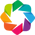

:Overlay
   .Points.I :Points   [invoice_date,pos_id]   (ntn,rate_value,sales_value,sales_tax,pos_pass,is_active,invoice_type,consider_for_Annex,month,weekday,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,sales_value_Average,Outliers,Score)
   .Curve.I  :Curve   [invoice_date]   (pos_id,ntn,rate_value,sales_value,sales_tax,pos_pass,is_active,invoice_type,consider_for_Annex,month,weekday,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,sales_value_Average,Outliers,Score)

In [ ]:
hv.extension('bokeh')
tooltips = [
    ('Weekday', '@Weekday'),
    ('Day', '@Month_day'),
    ('Month', '@Month'),
    ('Value', '@sales_value'),
    ('Average Value', '@sales_value_Average'),
    ('Outliers', '@Outliers')
]
hover = HoverTool(tooltips=tooltips)

hv.Points(df_hourly.query("Outliers == 1")).opts(size=10, color='#ff0000') * hv.Curve(df_hourly).opts(opts.Curve(title="Restaurant Sales Anomalies", xlabel="", ylabel="Demand" , height=300, responsive=True,tools=[hover,'box_select', 'lasso_select', 'tap'],show_grid=True))

#Trying Prophet Model

In [121]:
# prophet by Facebook
from prophet import Prophet

from sklearn.metrics import mean_absolute_error

In [122]:
df3=df.copy()

In [123]:
from prophet import Prophet
import pandas as pd
import numpy as np

# Assuming 'invoice_date', 'sales_value', and 'ntn' columns are in the 'df3' DataFrame
# Prepare df3 in Prophet's required format
prophet_data = df3.rename(columns={'invoice_date': 'ds', 'sales_value': 'y'})
prophet_data = prophet_data[['ntn', 'ds', 'y']]
prophet_data.set_index("ds")

casting = pd.DataFrame()

# Loop through each unique restaurant ID
for restaurant_id in prophet_data['ntn'].unique():
    # Subset data for the specific restaurant ID
    subset_data = prophet_data[prophet_data['ntn'] == restaurant_id]

    # Initialize and fit Prophet model for the specific restaurant ID
    model = Prophet()
    model.add_country_holidays(country_name='Pakistan')
    model.fit(subset_data)

    # Make predictions for the specific restaurant
    future = model.make_future_dataframe(periods=0)  # Predict for existing df3
    forecast = model.predict(future)

    # Detect anomalies based on forecast for this restaurant
    forecast['anomaly'] = 0  # Initialize anomaly column

    # Adjusted anomaly detection to handle negative and zero sales
    # Ensure lengths of subset_data['y'] and forecast['yhat'] match for subtraction
    min_length = min(len(subset_data), len(forecast))
    residuals = subset_data['y'].values[:min_length] - forecast['yhat'].values[:min_length]

    std_multiplier = 3  # Adjust this value based on sensitivity
    std_deviation = np.std(residuals)
    anomalies_std = residuals > std_multiplier * std_deviation

    # Mark the corresponding rows as anomalies
    forecast['anomaly'][:min_length] = anomalies_std.astype(int)

    casting = pd.concat([casting, forecast], axis=0)  # Updated anomaly detection

# Resultant 'casting' DataFrame will contain the detected anomalies


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp88m8384n/bis19hxg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp88m8384n/w1pziauv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73607', 'data', 'file=/tmp/tmp88m8384n/bis19hxg.json', 'init=/tmp/tmp88m8384n/w1pziauv.json', 'output', 'file=/tmp/tmp88m8384n/prophet_model7k6ien4a/prophet_model-20240108051924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:19:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:19:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonal

In [124]:
casting = casting.rename(columns={'ds': 'invoice_date', 'y': 'sales_value'})

In [125]:
df3_with_anomaly

pos_id  ntn        invoice_date  sales_value  consumer_name  \
0        387   55 2023-11-16 06:16:42     0.000000              0   
1        452  219 2023-11-16 19:36:35    79.650000              0   
2       1015    3 2023-11-18 02:12:24  2399.000000              0   
3        286  161 2023-11-14 22:14:43  1150.439941              0   
4        145  161 2023-08-05 20:34:58   331.859985              0   
...      ...  ...                 ...          ...            ...   
9021     643   90 2023-11-16 20:51:01  1221.000000              1   
9022     690   69 2023-11-19 08:09:00   200.000000              0   
9023     145  161 2023-11-16 16:02:58   177.000000              0   
9024     845  127 2023-11-20 22:06:14   655.000000              1   
9025     249   85 2023-11-16 11:02:29  1725.000000              0   

      consumer_address  extra_info  is_active  invoice_type  \
0                    0         0.0          1           1.0   
1                    0         0.0          1           1.0   
2                    0         0.0          1           1.0   
3                    1         0.0          1           1.0   
4                    1         0.0          1           1.0   
...                ...         ...        ...           ...   
9021                 0         0.0          1           1.0   
9022                 0         0.0          1           1.0   
9023                 1         0.0          1           1.0   
9024                 0         0.0          1           1.0   
9025                 0         0.0          1           1.0   

      consider_for_Annex  ...  scaled_pos_id  weekday_0  weekday_1  weekday_2  \
0                      1  ...      -0.002632          0          0          0   
1                      1  ...       0.168421          0          0          0   
2                      1  ...       1.650000          0          0          0   
3                      1  ...      -0.268421          0          1          0   
4                      1  ...      -0.639474          0          0          0   
...                  ...  ...            ...        ...        ...        ...   
9021                   1  ...       0.671053          0          0          0   
9022                   1  ...       0.794737          0          0          0   
9023                   1  ...      -0.639474          0          0          0   
9024                   1  ...       1.202632          1          0          0   
9025                   1  ...      -0.365789          0          0          0   

      weekday_3  weekday_4  weekday_5  weekday_6  anomaly  anomaly1  
0             1          0          0          0      0.0       0.0  
1             1          0          0          0      0.0       0.0  
2             0          0          1          0      0.0       0.0  
3             0          0          0          0      0.0       0.0  
4             0          0          1          0      0.0       0.0  
...         ...        ...        ...        ...      ...       ...  
9021          1          0          0          0      0.0       0.0  
9022          0          0          0          1      0.0       0.0  
9023          1          0          0          0      0.0       0.0  
9024          0          0          0          0      0.0       0.0  
9025          1          0          0          0      0.0       0.0  

[9026 rows x 22 columns]

In [126]:
df3_with_anomaly = pd.merge(df3, casting[['invoice_date', 'anomaly']], on='invoice_date', how='left')
df3_with_anomaly["anomaly"]=df3_with_anomaly["anomaly"].fillna(0)
df4=df2.copy()

In [127]:
df4["anomaly"] = df3_with_anomaly["anomaly"].fillna(0) + df4["anomaly"].fillna(0)

# Cap values greater than 1 to 1
df4.loc[df4.anomaly > 1, "anomaly"] = 1

# Replace remaining NaN values in df4["anomaly"] with a default value, e.g., -1
df4["anomaly"].fillna(0, inplace=True)

# Assign "anomaly" column from df4 to df2
df2["anomaly"] = df4["anomaly"]

In [128]:
df2.anomaly

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: anomaly, Length: 9026, dtype: float64

.su

In [129]:
df.columns

Index(['srb_invoice_id', 'pos_id', 'ntn', 'name', 'invoice_date', 'invoice_no',
       'rate_value', 'sales_value', 'sales_tax', 'consumer_name',
       'consumer_ntn', 'consumer_address', 'tariff_code', 'extra_info',
       'pos_user', 'pos_pass', 'is_active', 'created_date_time',
       'invoice_type', 'consider_for_Annex', 'month', 'weekday',
       'scaled_sales_value', 'scaled_ntn', 'scaled_pos_id'],
      dtype='object')

# now identifying anomaly by myself

In [130]:
(df.sales_value<10).sum()

1311

In [131]:
df2.loc[df2.sales_value<10,"anomaly"]=1

In [132]:
a=df2.groupby("ntn").is_active.sum().reset_index(name="total")
a.sort_values(by="total")

ntn  total
95   180      5
28    47      5
33    57      5
102  203      5
14    24      5
..   ...    ...
114  220    227
40    68    266
113  219   1373
80   161   1952
31    55   2262

[129 rows x 2 columns]

In [133]:
df2["rate_value"]=df["rate_value"]

In [134]:
df2.loc[df2.rate_value<12,"anomaly"]=1
df2.loc[df2.rate_value>14,"anomaly"]=1

In [136]:
df2["time"]=(df2['invoice_date']).dt.time
df2["day"]=(df2['invoice_date']).dt.day
df2["month"]=(df2['invoice_date']).dt.month

In [138]:
df2

pos_id  ntn        invoice_date  sales_value  consumer_name  \
0        387   55 2023-11-16 06:16:42     0.000000              0   
1        452  219 2023-11-16 19:36:35    79.650000              0   
2       1015    3 2023-11-18 02:12:24  2399.000000              0   
3        286  161 2023-11-14 22:14:43  1150.439941              0   
4        145  161 2023-08-05 20:34:58   331.859985              0   
...      ...  ...                 ...          ...            ...   
9995     643   90 2023-11-16 20:51:01  1221.000000              1   
9996     690   69 2023-11-19 08:09:00   200.000000              0   
9997     145  161 2023-11-16 16:02:58   177.000000              0   
9998     845  127 2023-11-20 22:06:14   655.000000              1   
9999     249   85 2023-11-16 11:02:29  1725.000000              0   

      consumer_address  extra_info  is_active  invoice_type  \
0                    0         0.0          1           1.0   
1                    0         0.0          1           1.0   
2                    0         0.0          1           1.0   
3                    1         0.0          1           1.0   
4                    1         0.0          1           1.0   
...                ...         ...        ...           ...   
9995                 0         0.0          1           1.0   
9996                 0         0.0          1           1.0   
9997                 1         0.0          1           1.0   
9998                 0         0.0          1           1.0   
9999                 0         0.0          1           1.0   

      consider_for_Annex  ...  weekday_2  weekday_3  weekday_4  weekday_5  \
0                      1  ...          0          1          0          0   
1                      1  ...          0          1          0          0   
2                      1  ...          0          0          0          1   
3                      1  ...          0          0          0          0   
4                      1  ...          0          0          0          1   
...                  ...  ...        ...        ...        ...        ...   
9995                   1  ...          0          1          0          0   
9996                   1  ...          0          0          0          0   
9997                   1  ...          0          1          0          0   
9998                   1  ...          0          0          0          0   
9999                   1  ...          0          1          0          0   

      weekday_6  anomaly  rate_value      time  day  month  
0             0      1.0         0.0  06:16:42   16     11  
1             0      0.0        13.0  19:36:35   16     11  
2             0      0.0        13.0  02:12:24   18     11  
3             0      1.0        13.0  22:14:43   14     11  
4             0      0.0        13.0  20:34:58    5      8  
...         ...      ...         ...       ...  ...    ...  
9995          0      0.0        13.0  20:51:01   16     11  
9996          1      0.0        13.0  08:09:00   19     11  
9997          0      0.0        13.0  16:02:58   16     11  
9998          0      0.0        13.0  22:06:14   20     11  
9999          0      0.0        13.0  11:02:29   16     11  

[9026 rows x 25 columns]

In [141]:
df2['time_seconds'] = df2['time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

In [146]:
df2=df2.drop(['invoice_date',"time"],axis=1, inplace=False)

In [142]:
from sklearn.preprocessing import StandardScaler, RobustScaler
df2['scaled_sales_value'] = RobustScaler().fit_transform(df2['sales_value'].values.reshape(-1,1))
df2['scaled_ntn'] = RobustScaler().fit_transform(df2['ntn'].values.reshape(-1,1))
df2['scaled_pos_id'] = RobustScaler().fit_transform(df2['pos_id'].values.reshape(-1,1))
df2['scaled_time'] = RobustScaler().fit_transform(df2['time_seconds'].values.reshape(-1,1))
df2['scaled_day'] = RobustScaler().fit_transform(df2['day'].values.reshape(-1,1))
df2['scaled_month'] = RobustScaler().fit_transform(df2['month'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "sales_value"
df_scaled = df2.drop(['time_seconds','sales_value',"ntn","pos_id","day","month"],axis = 1,inplace=False)
df_scaled.head()

invoice_date  consumer_name  consumer_address  extra_info  is_active  \
0 2023-11-16 06:16:42              0                 0         0.0          1   
1 2023-11-16 19:36:35              0                 0         0.0          1   
2 2023-11-18 02:12:24              0                 0         0.0          1   
3 2023-11-14 22:14:43              0                 1         0.0          1   
4 2023-08-05 20:34:58              0                 1         0.0          1   

   invoice_type  consider_for_Annex  scaled_sales_value  scaled_ntn  \
0           1.0                   1           -0.625018   -0.713043   
1           1.0                   1           -0.558838    0.713043   
2           1.0                   1            1.368252   -1.165217   
3           1.0                   1            0.330855    0.208696   
4           1.0                   1           -0.349283    0.208696   

   scaled_pos_id  ...  weekday_3  weekday_4  weekday_5  weekday_6  anomaly  \
0      -0.002632  ...          1          0          0          0      1.0   
1       0.168421  ...          1          0          0          0      0.0   
2       1.650000  ...          0          0          1          0      0.0   
3      -0.268421  ...          0          0          0          0      1.0   
4      -0.639474  ...          0          0          1          0      0.0   

   rate_value      time  scaled_time  scaled_day scaled_month  
0         0.0  06:16:42    -1.335219       -0.25          0.0  
1        13.0  19:36:35     0.290711       -0.25          0.0  
2        13.0  02:12:24    -1.831810        0.25          0.0  
3        13.0  22:14:43     0.612151       -0.75          0.0  
4        13.0  20:34:58     0.409388       -3.00         -3.0  

[5 rows x 23 columns]

In [154]:
def prep_data(df):
    X = df.drop(['anomaly'],axis=1, inplace=False) #
    X = np.array(X).astype(np.float)
    y = df[['anomaly']]
    y = np.array(y).astype(np.float)
    return X,y

# Create X and y from the prep_data function
X, y = prep_data(df_scaled)

# Random Forest with Resampling

In [157]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Define the resampling method
undersam = RandomUnderSampler(random_state=0)
oversam = RandomOverSampler(random_state=0)
smote = SMOTE(random_state=0)
borderlinesmote = BorderlineSMOTE(kind='borderline-2', random_state=0)

# Resample the training data
X_undersam, y_undersam = undersam.fit_resample(X_train, y_train)
X_oversam, y_oversam = oversam.fit_resample(X_train, y_train)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_borderlinesmote, y_borderlinesmote = borderlinesmote.fit_resample(X_train, y_train)


ROC AUC Score: 0.9236588889494629
Classification report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2210
         1.0       1.00      0.84      0.91       498

    accuracy                           0.97      2708
   macro avg       0.98      0.92      0.95      2708
weighted avg       0.97      0.97      0.97      2708

Confusion matrix:
 [[2209    1]
 [  80  418]]


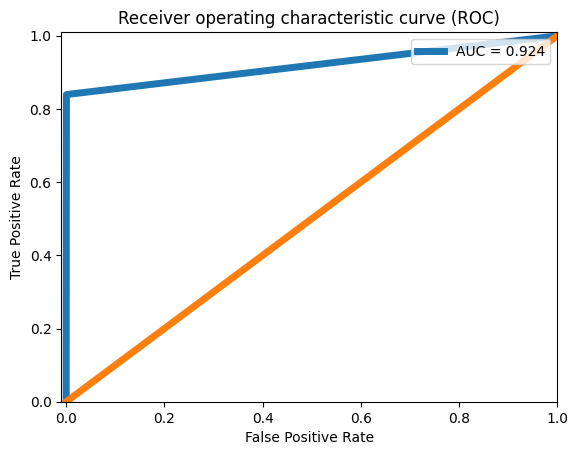

In [160]:
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve
probs = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs[:, 1])
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# Calculate average precision
average_precision = average_precision_score(y_test, y_predicted)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

# Plot the roc curve
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

## Training and Precison

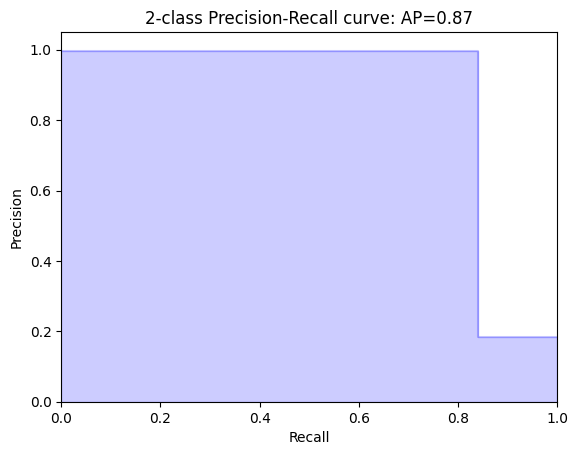

0.9700886262924667
AUC ROC score:  0.9236588889494629
Classification report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2210
         1.0       1.00      0.84      0.91       498

    accuracy                           0.97      2708
   macro avg       0.98      0.92      0.95      2708
weighted avg       0.97      0.97      0.97      2708

Confusion matrix:
 [[2209    1]
 [  80  418]]


In [161]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = RandomForestClassifier(random_state=5)
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Calculate average precision
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

# Print the classifcation report and confusion matrix
print(accuracy_score(y_test, y_predicted))
print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

##Random Forest Classifier Model adjustments

In [162]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE

# Define which resampling method and which ML model to use in the pipeline

resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2')
model = RandomForestClassifier()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Random Forest Classifier', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data
pipeline.fit(X_train, y_train)
y_predicted = pipeline.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

print(accuracy_score(y_test, y_predicted))
print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))
# Obtain the results from the classification report and confusion matrix

print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',  confusion_matrix(y_true = y_test, y_pred = y_predicted))

0.957533234859675
AUC ROC score:  0.9227593632448344
Classifcation report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2210
         1.0       0.93      0.84      0.88       498

    accuracy                           0.96      2708
   macro avg       0.95      0.91      0.93      2708
weighted avg       0.96      0.96      0.96      2708

Confusion matrix:
 [[2177   33]
 [  82  416]]


# Auto Encoder Model

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Make another copy of df2 and drop the unimportant "Time" feature
data=df2.copy()
# Use scikit’s StandardScaler on the "Amount" feature
# The scaler removes the mean and scales the values to unit variance
data['sales_value'] = StandardScaler().fit_transform(df2['sales_value'].values.reshape(-1,1))
data['ntn'] = StandardScaler().fit_transform(df2['ntn'].values.reshape(-1,1))
data['pos_id'] = StandardScaler().fit_transform(df2['pos_id'].values.reshape(-1,1))
data['time_seconds'] = StandardScaler().fit_transform(df2['time_seconds'].values.reshape(-1,1))
data['day'] = StandardScaler().fit_transform(df2['day'].values.reshape(-1,1))
data['month'] = StandardScaler().fit_transform(df2['month'].values.reshape(-1,1))
# Create the training and testing sets
X1_train, X1_test = train_test_split(data, test_size=.3, random_state=0)
X1_train = X1_train[X1_train.anomaly == 0] # train the model on normal transactions
X1_train = X1_train.drop(['anomaly'], axis=1)

y1_test = X1_test['anomaly']
X1_test  = X1_test.drop(['anomaly'], axis=1) #drop the class column


#transform to ndarray
X1_train = X1_train.values
X1_test = X1_test.values
X1_train.shape

(5079, 26)

## making layers

In [171]:
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

input_dim = X1_train.shape[1] #num of columns, 29
encoding_dim = 14
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-5

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim,
                activation="tanh",
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

## Training the Data

In [172]:
nb_epoch = 100
batch_size = 128
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

checkpointer = ModelCheckpoint(filepath='autoencoder_fraud.h5',
                               save_best_only=True,
                               verbose=0)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X1_train, X1_train,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X1_test, X1_test),
                          verbose=1,
                          callbacks=[checkpointer, tensorboard]).history
load_model('autoencoder_fraud.h5')

Epoch 1/100
40/40 [==============================] - 2s 12ms/step - loss: 6.7536 - accuracy: 0.7342 - val_loss: 2859.6890 - val_accuracy: 0.8449
Epoch 2/100
40/40 [==============================] - 0s 7ms/step - loss: 5.8863 - accuracy: 0.9951 - val_loss: 2858.5134 - val_accuracy: 0.8449
Epoch 3/100
40/40 [==============================] - 0s 8ms/step - loss: 5.3708 - accuracy: 0.9951 - val_loss: 2857.6992 - val_accuracy: 0.8449
Epoch 4/100
40/40 [==============================] - 0s 7ms/step - loss: 5.0025 - accuracy: 0.9951 - val_loss: 2857.0347 - val_accuracy: 0.8449
Epoch 5/100
40/40 [==============================] - 0s 7ms/step - loss: 4.7045 - accuracy: 0.9951 - val_loss: 2856.4429 - val_accuracy: 0.8449
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 4.4406 - accuracy: 0.9951 - val_loss: 2855.8943 - val_accuracy: 0.8449
Epoch 7/100
40/40 [==============================] - 0s 7ms/step - loss: 4.1986 - accuracy: 0.9951 - val_loss: 2855.3762 - val_accuracy

In [175]:
predictions = autoencoder.predict(X1_test)
mse = np.mean(np.power(X1_test - predictions, 2), axis=1)
df_error = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y1_test})
df_error.describe()

85/85 [==============================] - 0s 3ms/step


reconstruction_error   true_class
count          2.708000e+03  2708.000000
mean           2.844054e+03     0.183900
std            6.537278e+04     0.387474
min            1.450088e-01     0.000000
25%            2.947875e-01     0.000000
50%            4.893187e-01     0.000000
75%            1.134741e+00     0.000000
max            2.521596e+06     1.000000

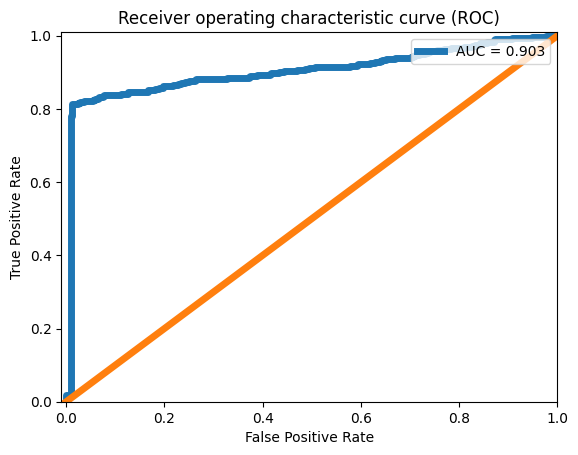

In [177]:
from sklearn.metrics import auc, roc_curve,precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import recall_score,f1_score,precision_recall_fscore_support

false_positive_rate, true_positive_rate, thresholds = roc_curve(df_error.true_class, df_error.reconstruction_error)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot the roc curve
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

##Analysis

In [ ]:
df2=df_merged[["ds","yhat"]]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
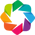

:Layout
   .Curve.I   :Curve   [ds]   (yhat)
   .Curve.II  :Curve   [ds]   (yhat)
   .Curve.III :Curve   [ds]   (yhat)

In [ ]:
hv.extension('bokeh')
Hourly = hv.Curve(df2.set_index('ds').resample('H').mean()).opts(
    opts.Curve(title=" Hourly sales of restaurant", xlabel="", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

Daily = hv.Curve(df2.set_index('ds').resample('D').mean()).opts(
    opts.Curve(title=" Daily sales of restaurant", xlabel="", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

Weekly = hv.Curve(df2.set_index('ds').resample('W').mean()).opts(
    opts.Curve(title=" Weekly sales of restaurant", xlabel="Date", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))


(Hourly + Daily + Weekly).opts(shared_axes=False).cols(1)

#Moving Average

In [ ]:
def predict_EMA(feature):
  window= 3
  ema = df[feature].ewm(span=window,adjust=False).mean()
  rstd = df[feature].rolling(window=window).std()
  bands = pd.DataFrame()
  bands['invoice_date']=  (df['invoice_date']).copy()
  bands['invoice_date'] = pd.to_datetime(bands['invoice_date'], dayfirst=True)
  bands['ema'] = ema
  bands['lower'] = ema - 2 * rstd
  bands['upper'] = ema + 2 * rstd
  bands = bands.join(df[feature])
  bands = bands.set_index('invoice_date')
  fig = plt.figure(figsize=(20, 6))
  ax = bands.plot(title=feature,  figsize=(20, 6))
  ax.fill_between(bands.index, bands['lower'], bands['upper'], color='#ADCCFF', alpha=0.4)
  ax.set_xlabel('invoice_date')
  ax.set_ylabel(feature)
  ax.grid()
  plt.show()
  return bands

<Figure size 2000x600 with 0 Axes>

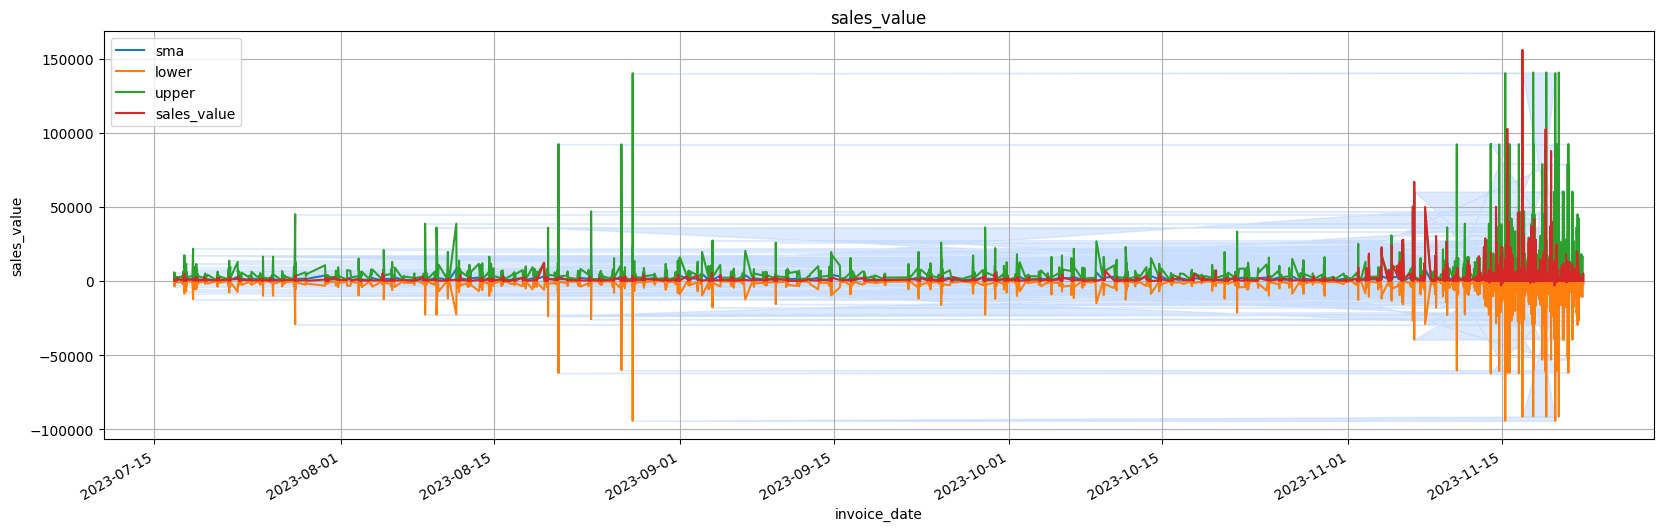

Anamolies for sales_value_SMA values
             invoice_date  sales_value  sales_value_SMA
8    2023-11-19 17:19:55       5605.0      5443.331125
27   2023-11-19 21:49:31       4431.0      4257.448894
34   2023-11-19 21:58:48       2746.0      2654.195728
49   2023-11-16 00:00:00      14060.0     12981.678870
62   2023-11-16 23:11:41      16350.0     14993.933533
...                  ...          ...              ...
9908 2023-11-14 10:38:15       6050.0      5719.389582
9916 2023-11-20 00:23:50       1769.9      1760.573641
9931 2023-11-19 09:33:40       9555.0      8783.236938
9976 2023-11-17 20:06:45       5161.0      4858.559061
9993 2023-11-21 00:11:49       4740.0      4407.728713

[492 rows x 3 columns]


In [ ]:
bands = predict_EMA('sales_value')
bands.reset_index(inplace=True)
max= df['sales_value'].max()
bands['upper'].fillna(max , inplace=True)
df['sales_EMA']= bands['upper'].copy()
print('Anamolies for EMA_Range values\n', df[df['sales_value']>df['sales_EMA']][['invoice_date','sales_value', 'sales_EMA']])

In [ ]:
anomaly['sales_value_anomaly_EMA'][df['sales_value']>df['sales_value_EMA']]= 'anomaly'
anomaly['sales_value_anomaly_EMA'][df['sales_value']<=df['sales_value_EMA']]= ''

 Number of detected anomalies:  1484


#clustering

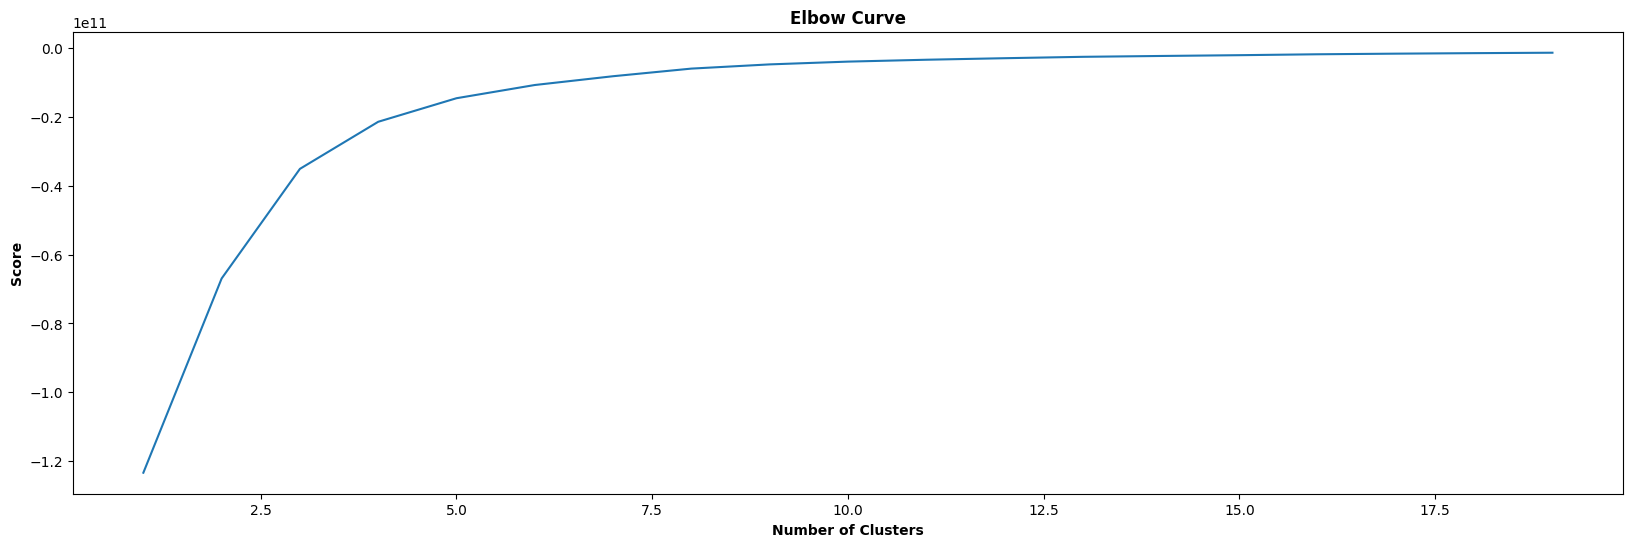

In [ ]:
from sklearn.cluster import KMeans
numeric_Cols=['pos_id', 'ntn', 'sales_value', 'is_active', 'consider_for_Annex',"consumer_name","consumer_address","weekday"]
numeric_data = df2[numeric_Cols]

# Handling missing values if any
numeric_data.fillna(0, inplace=True)  # Fill NaN or missing values with 0, this can vary based on your df

n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(numeric_data) for i in n_cluster]
scores = [kmeans[i].score(numeric_data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters', fontname="Times New Roman",fontweight="bold")
plt.ylabel('Score',fontname="Times New Roman",fontweight="bold")
plt.title("Elbow Curve",fontname="Times New Roman",fontweight="bold")
plt.show();

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
X = numeric_data
X = X.reset_index(drop=True)
km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_
X.head()

pos_id  ntn  sales_value  is_active  consider_for_Annex consumer_name  \
0     387   55     0.000000          1                   1             0   
1     452  219    79.650000          1                   1             0   
2    1015    3  2399.000000          1                   1             0   
3     286  161  1150.439941          1                   1             0   
4     145  161   331.859985          1                   1             0   

  consumer_address  weekday  
0                0        3  
1                0        3  
2                0        5  
3                1        1  
4                1        5

In [ ]:
from scipy.spatial.distance import euclidean
import numpy as np

# Calculate the centroids of each cluster
df2=df2[['cluster']+numeric_Cols]
cluster_centroids = df2.groupby('cluster').mean()
# Calculate the distance of each point from its respective cluster centroid
distances = []
for i in range(len(df2)):
    cluster_num = df2.loc[i, 'cluster']
    centroid = cluster_centroids.loc[cluster_num]
    point = df2.loc[i, numeric_Cols]
    distance = euclidean(point, centroid)
    distances.append(distance)

df2['distance_from_centroid'] = distances

# Set a threshold for anomaly detection (e.g., points beyond 3 standard deviations)
threshold = np.mean(df2['distance_from_centroid']) + 3* np.std(df2['distance_from_centroid'])

# Find anomalies (points beyond the threshold)
anomalies = df2[df2['distance_from_centroid'] > threshold]

# Output anomalies
print(anomalies)


KeyError: ignored

In [ ]:
anomalies.sort_values(by="sales_value")

In [ ]:
data = numeric_data

X = data.values
X_std = StandardScaler().fit_transform(X)

# Calc eigenvec cor & eig_vals of covar matrix
mean_vec = np.mean(X_std, axis = 0)

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# eig_val,eig_vecs tuple
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse = True)

In [ ]:
# Standardize features
data=numeric_data
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)

# Reduce components to 2
pca = PCA(n_components = 8)
data = pca.fit_transform(data)

# Standardize 2 new features
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)


In [ ]:
df['cluster'] = kmeans[10].predict(data)
df.index = data.index

df['pc1'] = data[0]
df['pc2'] = data[1]
df['pc3'] = data[2]
df['pc4'] = data[3]
df['pc5'] = data[4]
df['pc6'] = data[5]
df['pc7'] = data[6]
df['pc8'] = data[7]
df['cluster'].value_counts()

10    10000
Name: cluster, dtype: int64

In [ ]:
def getDistanceByPoint(data, model):
    distance = pd.Series(dtype='float64')  # Initialize an empty Series
    for i in range(len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i] - 1]
        distance.at[i] = np.linalg.norm(Xa - Xb)
    return distance


In [ ]:
outliers_fraction = 0.01

distance = getDistanceByPoint(data, kmeans[9])
outlier_num = int(outliers_fraction * len(distance))

threshold = distance.nlargest(outlier_num).min()

df['anomaly'] = (distance >= threshold).astype(int)

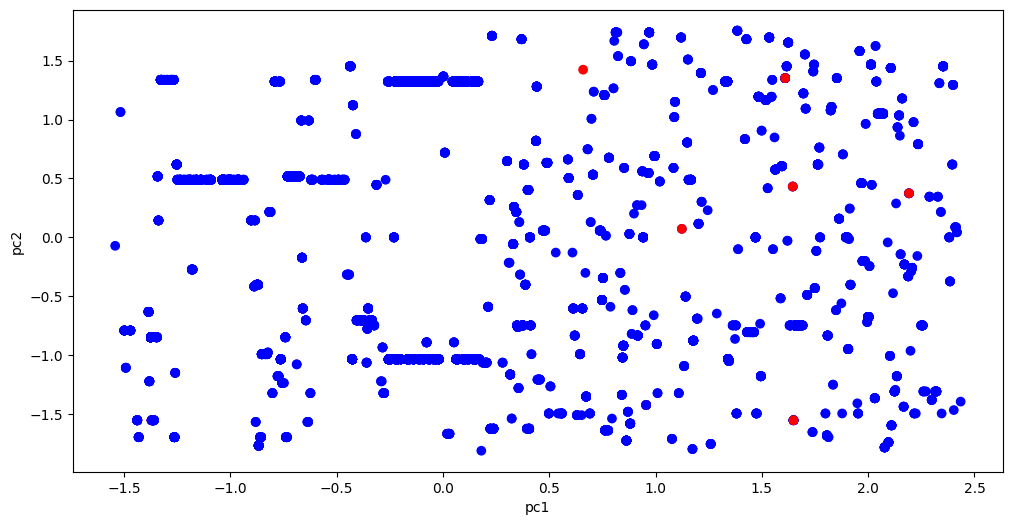

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))

colors = {0:'blue', 1:'red'}

ax.scatter(df['pc1'], df['pc2'],
           c = df['anomaly'].apply(lambda x: colors[x]))

plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show();

In [ ]:
df[df.anomaly==1].sort_values(by="sales_value")

srb_invoice_id  pos_id  ntn             name        invoice_date  \
8746  379231120211814895     379  219     Hunter Ortiz 2023-11-20 21:18:14   
9348  396231113215128056     397  219     Hunter Ortiz 2023-11-13 21:51:28   
996   377231113214043067     377  219     Hunter Ortiz 2023-11-13 21:40:43   
7102  453231113225803794     452  219     Hunter Ortiz 2023-11-13 22:58:03   
7221  379231120194757832     380  219     Hunter Ortiz 2023-11-20 19:47:57   
...                  ...     ...  ...              ...                 ...   
7329   55920231113220647     559   43       John Moore 2023-11-13 12:00:00   
4844  494231109173538242     485  126     Natalia Diaz 2023-11-09 00:00:00   
6741  220231117171810791       2  122  Athena Carrillo 2023-11-17 00:00:00   
846   969231119232121879     969  144    Matthew Gupta 2023-11-19 10:13:56   
5117   92920231117165045     929  180      Julian Ross 2023-11-17 16:50:45   

              invoice_no  rate_value  sales_value  sales_tax consumer_name  \
8746     0075-601-309724        13.0      1902.65     247.35             0   
9348    0069-1015-212595        13.0      1902.66     247.34             0   
996      0040-704-274709        13.0      1902.66     247.34             0   
7102     0039-701-254291        13.0      1902.66     247.34             0   
7221     0075-937-323299        13.0      1911.51     248.49             0   
...                  ...         ...          ...        ...           ...   
7329            D0109251        13.0     28781.00    3741.40             1   
4844  20231109-NAD-64780        13.0     30388.00    3950.44             1   
6741                5434         5.0     31143.00    1557.00             0   
846                 2432        13.0     36980.00    4807.40             0   
5117                3690        13.0     36996.00    4809.35             1   

      ... is_active   created_date_time invoice_type  consider_for_Annex  \
8746  ...         1 2023-11-20 21:26:10          1.0                   1   
9348  ...         1 2023-11-14 12:56:06          1.0                   1   
996   ...         1 2023-11-14 12:31:11          1.0                   1   
7102  ...         1 2023-11-14 10:17:55          1.0                   1   
7221  ...         1 2023-11-20 19:55:00          1.0                   1   
...   ...       ...                 ...          ...                 ...   
7329  ...         1 2023-11-14 12:24:15          1.0                   1   
4844  ...         1 2023-11-15 15:05:05          1.0                   1   
6741  ...         1 2023-11-17 17:18:11          1.0                   1   
846   ...         1 2023-11-19 23:33:37          1.0                   1   
5117  ...         1 2023-11-17 16:59:18          1.0                   1   

     month  weekday  cluster       pc1       pc2  anomaly  
8746    11        0        0 -0.210842  0.053713        1  
9348    11        0        0 -0.182928  0.060695        1  
996     11        0        0 -0.213943  0.052939        1  
7102    11        0        0 -0.097636  0.082024        1  
7221    11        0        0 -0.209065  0.055034        1  
...    ...      ...      ...       ...       ...      ...  
7329    11        0        0  2.163591  3.318494        1  
4844    11        3        0  1.680325  4.168059        1  
6741    11        4        0  0.158377  2.949259        1  
846     11        6        0  1.654900  4.253858        1  
5117    11        4        0  2.305691  5.396863        1  

[100 rows x 26 columns]

# SVM

In [ ]:
data=numeric_data
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)

data = pd.DataFrame(np_scaled)

# Train

osvm = OneClassSVM(nu = outliers_fraction,
                   kernel = 'rbf',
                   gamma = 0.01)

osvm.fit(data)

df['anomaly2'] = pd.Series(osvm.predict(data))

NameError: ignored

KeyError: ignored

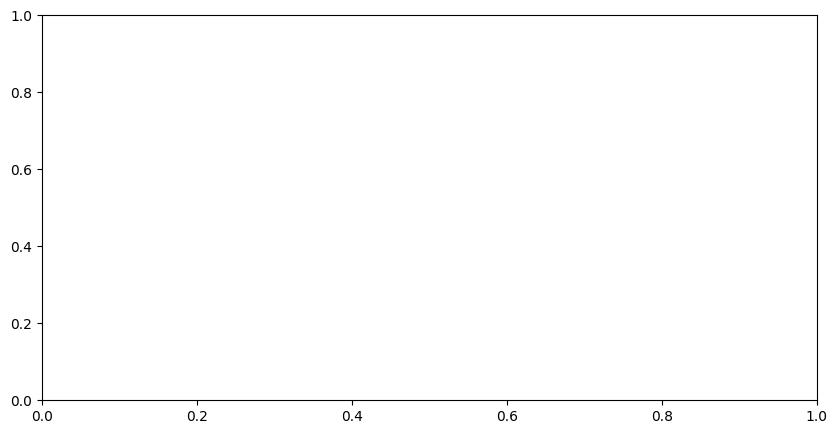

In [ ]:

fig, ax = plt.subplots(figsize = (10, 5))

a = df.loc[df['anomaly2'] == -1,
           ['invoice_date', 'sales_value']]

ax.plot(df['invoice_date'], df['sales_value'],
        color = 'orange',
        label = 'Normal')

ax.scatter(a['invoice_date'], a['sales_value'],
           color = 'red',
           label = 'Anomaly')

plt.legend()
plt.show();

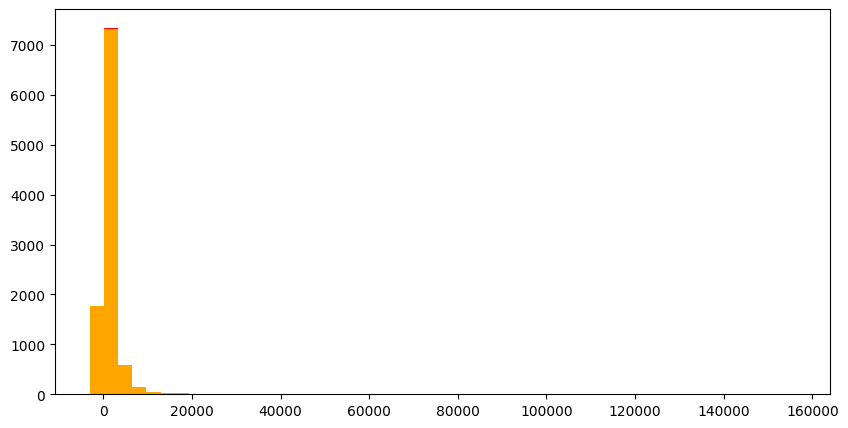

In [ ]:
a = df.loc[df['anomaly2'] == 1, 'sales_value']
b = df.loc[df['anomaly2'] == -1, 'sales_value']

fig, ax = plt.subplots(figsize = (10, 5))

ax.hist([a, b], bins = 50,
        stacked = True, color = ['orange','red'])

plt.show();

#model

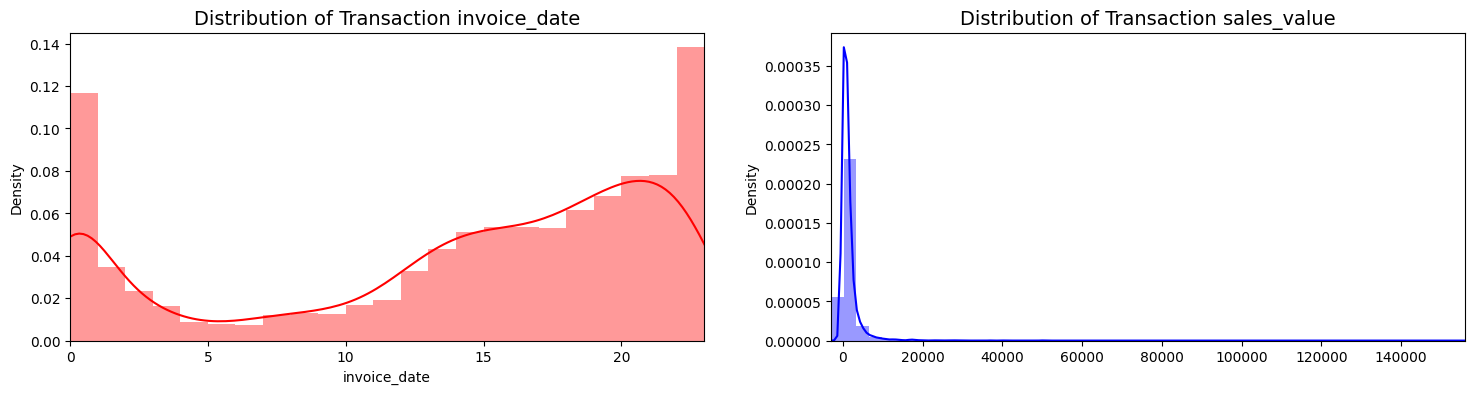

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

# Plot the distribution of 'invoice_date' feature
sns.distplot(df['invoice_date'].dt.hour, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction invoice_date', fontsize=14)
ax[0].set_xlim([min(df['invoice_date'].dt.hour), max(df['invoice_date'].dt.hour)])

sns.distplot(df['sales_value'].values, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction sales_value', fontsize=14)
ax[1].set_xlim([min(df['sales_value'].values), max(df['sales_value'].values)])

plt.show()